# CTD casts from Line P

This IPython notebook plots CTD casts from historical stations along Canada's Line P in the North Pacific ocean. 

Historical background on Line P can be found at:
http://www.pac.dfo-mpo.gc.ca/science/oceans/data-donnees/line-p/history-histoire-eng.html

This notebook uses bottle (.che) files obtained at:
http://www.pac.dfo-mpo.gc.ca/science/oceans/data-donnees/line-p/data-eng.html

The input file name may be changed to plot profiles from different cruises and/or stations.

Written by Tom Connolly (tconnolly@mlml.calstate.edu) 
for MS142 (Physical Oceanography)
August 2015

In [21]:
%pylab inline
import gsw as gsw
import numpy as np
from re import sub
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [22]:
# Load and plot bottle data from Line P cruises
# data from 

filename = "2006-08-0026.che"

# read in data
f = open(filename, 'r')

readdata = False
firstline = True
for line in f.xreadlines():
    if readdata==True:
        line = sub("[a-z]", ' ', line) # strip flag characters
        d = np.fromstring(line,sep=" ")
        if firstline == True:
            data = d
            firstline = False
        else:
            data = np.vstack((data,d))
    if line.startswith("*END OF HEADER")==True:
        readdata=True          
    # get station position from header
    if "LATITUDE" in line:
        starti = line.index(":")+1
        endi = line.index("N")-1
        degmin = np.fromstring(line[starti:endi],sep=" ")
        lat = degmin[0]+degmin[1]/60
    if "LONGITUDE" in line:
        starti = line.index(":")+1
        endi = line.index("W")-1
        degmin = np.fromstring(line[starti:endi],sep=" ")
        lon = -degmin[0]-degmin[1]/60
    if "STATION" in line:
        starti = line.index(":")+1
        station_name = line[starti:-2]
    if "START TIME" in line:    
        starti = line.index("C")+1 
        endi = line.index(".") 
        date_string = line[starti:endi]
    
f.close()
      
ncol = data.shape[1]    
    
p = data[:,0]   # pressure [dbar]
T = data[:,1]   # temperature [deg C]
Sp = data[:,2]  # practical salinity
if ncol >= 4:
    O2 = data[:,3]
if ncol >= 5:
    nitrate = data[:,4]
if ncol >= 6:
    phosphate = data[:,5]
if ncol >= 7:
    silicate = data[:,6]

In [23]:
SA = gsw.SA_from_SP(Sp,p,lon,lat)
Tpot = gsw.pt_from_t(SA, T, p, 0)
CT = gsw.CT_from_t(SA,T,p)

## Temperature $T$, potential temperature $\theta$, and conservative temperature $\Theta$

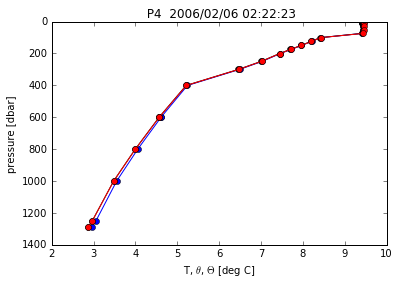

In [24]:
plt.plot(T,p,'b-o')
plt.plot(Tpot,p,'k-o')
plt.plot(CT,p,'r-o')
plt.gca().invert_yaxis()
plt.xlabel('T, $\\theta$, $\Theta$ [deg C]')
plt.ylabel('pressure [dbar]')
plt.title(station_name + ' ' + date_string)

## Practical salinity $S_P$ and absolute salinity $S_A$

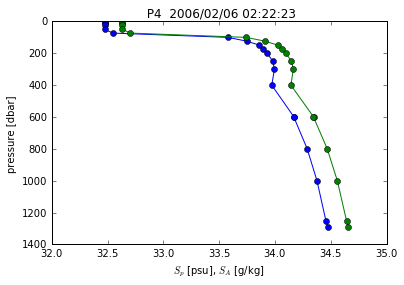

In [25]:
plt.plot(Sp,p,'-o')
plt.plot(SA,p,'-o')
plt.gca().invert_yaxis()
plt.xlabel('$S_p$ [psu], $S_A$ [g/kg]')
plt.ylabel('pressure [dbar]')
plt.title(station_name + ' ' + date_string)

## $\Theta$-$S$ diagram

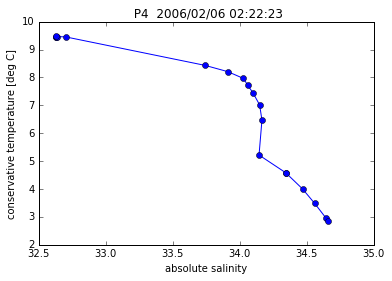

In [26]:
plt.plot(SA,CT,'-o')
plt.xlabel('absolute salinity')
plt.ylabel('conservative temperature [deg C]')
plt.title(station_name + ' ' + date_string)
plt.show()

## Dissolved oxygen

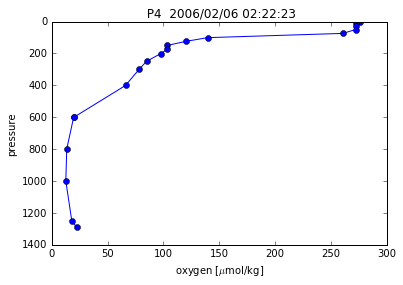

In [27]:
if ncol >= 4:
    plt.plot(O2,p,'-o')
    plt.gca().invert_yaxis()
    plt.xlabel('oxygen [$\mu$mol/kg]')
    plt.ylabel('pressure')
    plt.title(station_name + ' ' + date_string)

## Oxygen vs. NO$^-_3$+NO$^-_2$

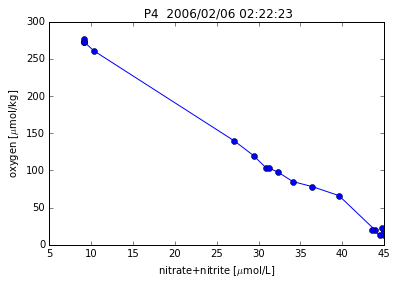

In [28]:
if ncol >= 5:
    plt.plot(nitrate,O2,'-o')
    plt.xlabel('nitrate+nitrite [$\mu$mol/L]')
    plt.ylabel('oxygen [$\mu$mol/kg]')
    plt.title(station_name + ' ' + date_string)